# Linear regression using SKLearn on your own Data!
This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!

In [2]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

# Data Loading, Cleaning, and Setup

Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs - https://pandas.pydata.org/docs/reference/index.html#api <br>
seaborn docs - https://seaborn.pydata.org/api.html

In [3]:
df = pd.read_csv("../../NKI_cleaned.csv")

In [4]:
df.tail()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
267,s71,308,48,1,2.6083,1.982204,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,s72,309,39,1,5.5041,3.028063,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,s73,310,50,1,2.6192,2.149213,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,s75,311,52,1,2.2905,2.209446,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088
271,s76,312,52,1,3.7370,2.127310,0,0,1,1,...,-0.234388,0.181319,-0.030782,-1.035581,-0.521642,-0.301661,-0.060805,0.794952,-1.089303,-0.326193


In [5]:
df = df[['Patient', 'ID', 'age', 'eventdeath', 'survival', 'timerecurrence',
       'chemo', 'hormonal', 'amputation', 'histtype']]

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(272, 10)

In [8]:
df.head(10)

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype
0,s122,18,43,0,14.817248,14.817248,0,0,1,1
1,s123,19,48,0,14.261465,14.261465,0,0,0,1
2,s124,20,38,0,6.644764,6.644764,0,0,0,1
3,s125,21,50,0,7.748118,7.748118,0,1,0,1
4,s126,22,38,0,6.436687,6.318960,0,0,1,1
5,s127,23,42,0,5.037645,2.743326,1,0,1,1
6,s128,24,50,0,8.739220,8.739220,1,1,0,1
7,s129,25,43,0,7.567420,7.567420,1,0,0,1
8,s130,26,47,0,7.296372,7.296372,1,0,0,1
9,s131,27,39,1,4.662560,1.114305,0,0,0,1


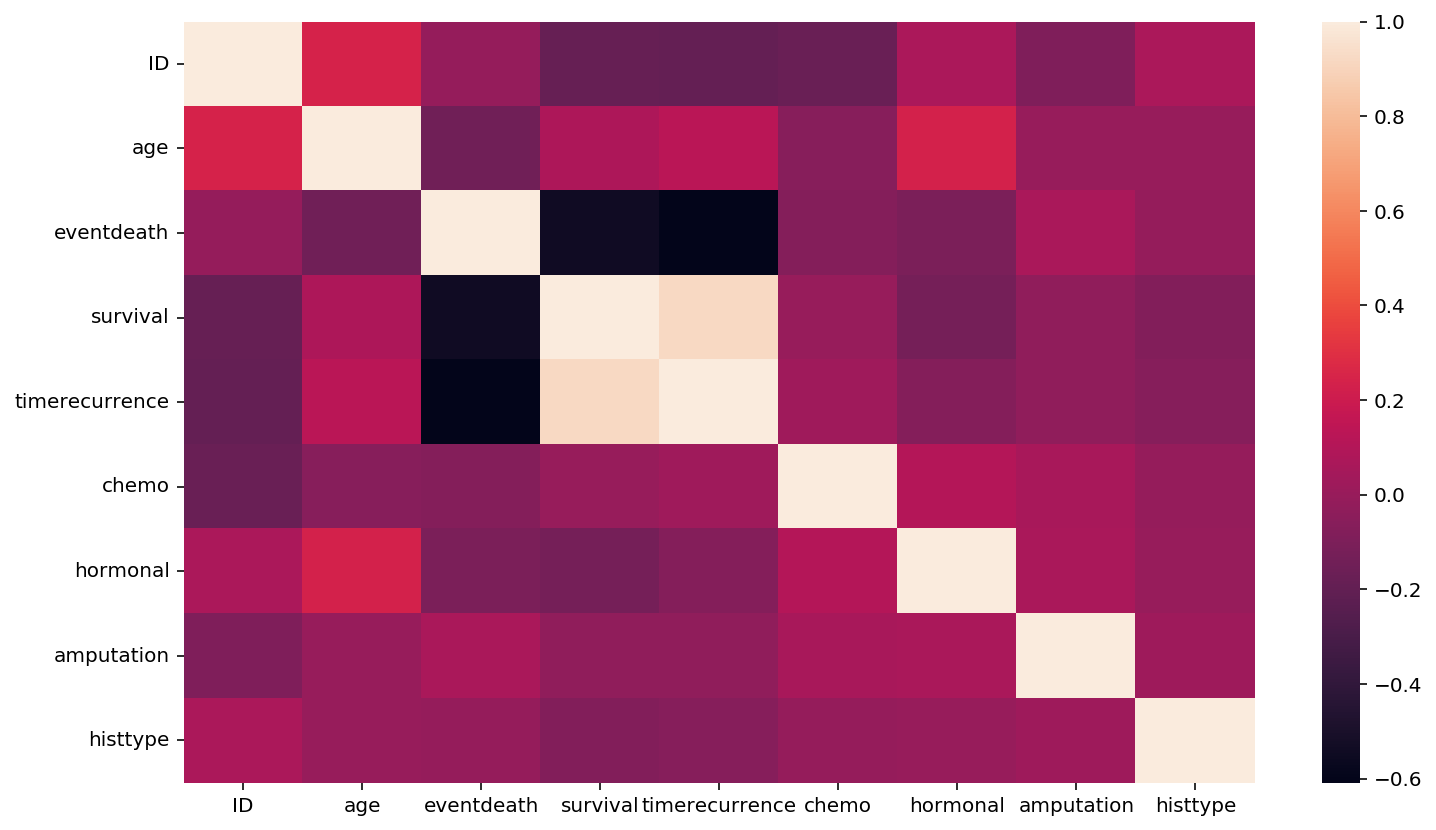

In [9]:
sns.heatmap(df.corr())

In [10]:
X = df["hormonal"].to_numpy()

In [11]:
y = df["survival"].to_numpy()

In [12]:
X.shape

(272,)

In [13]:
y.shape

(272,)

In [14]:
idx = np.arange(len(X)) 

In [15]:
np.random.shuffle(idx)

In [16]:
idx

array([266, 163, 202, 237,  71,  60, 140, 188, 184, 238, 130,  99, 121,
        98,  15, 182, 133,  56, 134, 207, 194, 116,  39,  40, 212,  13,
       261,  44,  43,  59, 208,  86,  80,  19,  97,  61,  31,  57, 260,
        62,  16, 189, 259,  95, 222,  87, 147, 132,  45,  52, 159,  54,
       186, 135, 179,  69,  34, 181,  81,  88, 170, 215, 263, 210,  48,
         9, 250, 257, 176, 145,  10, 265, 165, 158, 241, 193, 240,  21,
        27,  12, 112, 146, 268,  36, 196, 224, 213, 185,  41, 262, 205,
       154, 167, 267,  37,  20, 195,  23, 203, 173, 172, 155, 104,  11,
       264,  47, 220, 270, 235,  73, 101,   8, 269, 139, 234, 129,  65,
       115, 221, 144, 233,  58, 157, 114, 160,  66,  82,  49, 251,  85,
         2,  63,  64,   1, 236,  25,  38, 229, 249, 216, 187, 102, 211,
        17,  70, 128, 206,  72,  14, 246, 245,   7, 230,  50,  90,  67,
       164, 244, 271, 247,   4, 180, 209,  29, 138, 226, 153, 223, 178,
       256, 199, 239,  22,  77, 200,  76, 149, 161,  28, 171, 12

In [17]:
split_threshold = int(len(X) * 0.8)

In [18]:
split_threshold

217

In [19]:
train_idx = idx[:split_threshold]

In [20]:
test_idx = idx[split_threshold:]

In [21]:
x_train = X[train_idx]

In [22]:
y_train = y[train_idx]

In [23]:
x_test = X[test_idx]

In [24]:
y_test = y[test_idx]

In [25]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

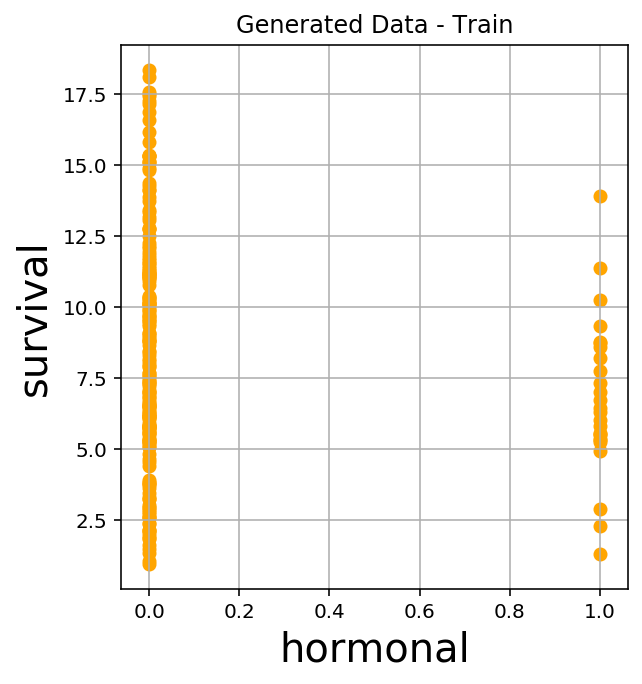

In [26]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='orange')
plt.xlabel('hormonal', fontsize = 20)
plt.ylabel('survival', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

In [27]:
from sklearn.linear_model import LinearRegression
linr2 = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr2.fit(x_train, y_train)

print(linr2.intercept_, linr2.coef_[0])


[8.43130082] [-1.64084059]


In [28]:
y_hat = linr2.predict(x_test)

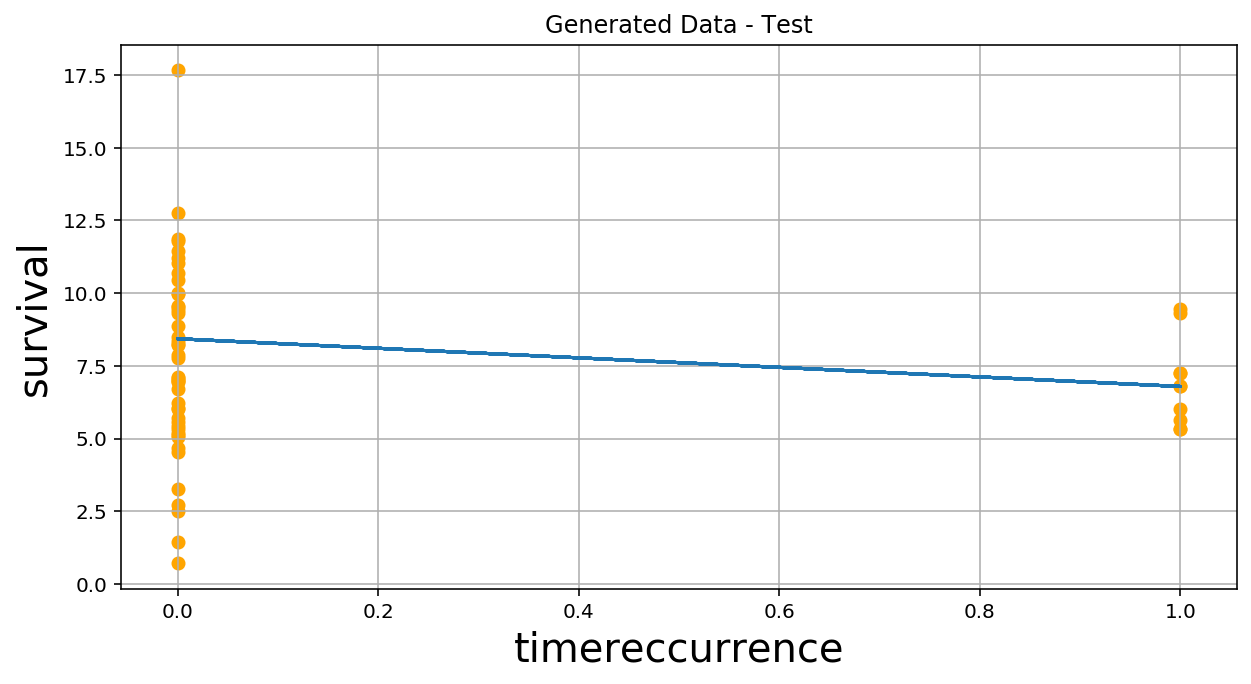

In [29]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat)

plt.scatter(x_test, y_test, c='orange')

plt.xlabel('timereccurrence', fontsize = 20) 
plt.ylabel('survival', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [30]:
df["survival"].min()

0.711841

In [31]:
df["survival"].max()

18.340862

In [32]:
def divide_survival(x):
    if float(x) <= 10:
        return "low"
    else:
        return "high"

In [33]:
df["survival"].apply(divide_survival)

0      high
1      high
2       low
3       low
4       low
       ... 
267     low
268     low
269     low
270     low
271     low
Name: survival, Length: 272, dtype: object

In [34]:
df["survival_type"] = df["survival"].apply(divide_survival)

In [35]:
from sklearn import svm

In [36]:
X = df[["age", "hormonal"]].to_numpy()

In [37]:
y = df["survival_type"]

In [38]:
idx = np.arange(len(X))
np.random.shuffle(idx)

split_threshold = int(len(X) * 0.8)

In [39]:
x_train = X[:split_threshold]
x_test = X[split_threshold:]

y_train = y[:split_threshold]
y_test = y[split_threshold:]

In [40]:
clf = svm.SVC()

In [41]:
clf.fit(x_train, y_train)

SVC()

In [42]:
y_hat = clf.predict(x_test)
y_hat

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low'], dtype=object)

In [43]:
y_test

217     low
218    high
219    high
220    high
221    high
222    high
223     low
224     low
225     low
226     low
227     low
228     low
229     low
230     low
231     low
232    high
233    high
234     low
235     low
236    high
237     low
238     low
239     low
240     low
241     low
242     low
243     low
244     low
245     low
246    high
247    high
248    high
249     low
250    high
251     low
252     low
253     low
254     low
255     low
256     low
257     low
258    high
259    high
260    high
261     low
262     low
263     low
264     low
265     low
266     low
267     low
268     low
269     low
270     low
271     low
Name: survival_type, dtype: object

In [44]:
from sklearn import metrics

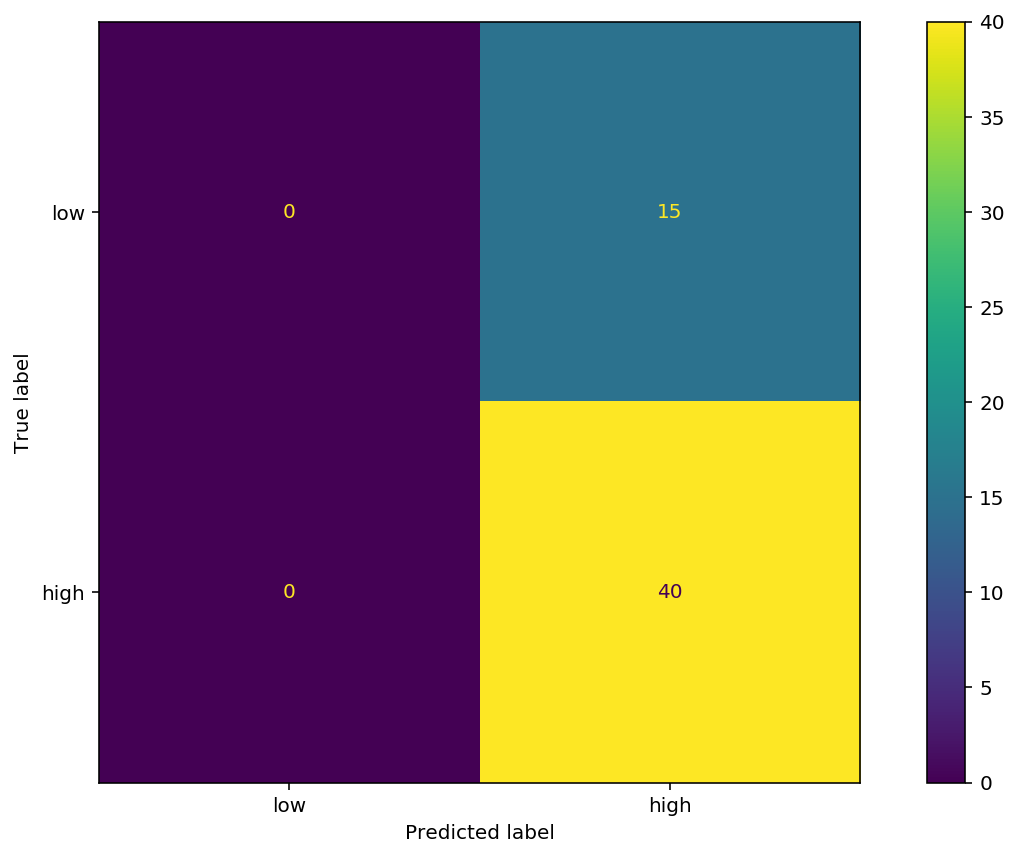

In [45]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["low", "high"])

cm_display.plot()

plt.show()

In [46]:
df

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,survival_type
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,high
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,high
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,low
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,low
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,low
...,...,...,...,...,...,...,...,...,...,...,...
267,s71,308,48,1,2.608300,1.982204,1,0,1,1,low
268,s72,309,39,1,5.504100,3.028063,0,0,1,1,low
269,s73,310,50,1,2.619200,2.149213,0,0,1,1,low
270,s75,311,52,1,2.290500,2.209446,0,1,1,1,low


In [47]:
def data_convert(num):
    if num == 1:
        return True
    else:
        return False

In [48]:
df["hormonal"] = df["hormonal"].apply(data_convert)

In [49]:
df["chemo"] = df["chemo"].apply(data_convert)

In [50]:
df["amputation"] = df["amputation"].apply(data_convert)

In [51]:
df

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,survival_type
0,s122,18,43,0,14.817248,14.817248,False,False,True,1,high
1,s123,19,48,0,14.261465,14.261465,False,False,False,1,high
2,s124,20,38,0,6.644764,6.644764,False,False,False,1,low
3,s125,21,50,0,7.748118,7.748118,False,True,False,1,low
4,s126,22,38,0,6.436687,6.318960,False,False,True,1,low
...,...,...,...,...,...,...,...,...,...,...,...
267,s71,308,48,1,2.608300,1.982204,True,False,True,1,low
268,s72,309,39,1,5.504100,3.028063,False,False,True,1,low
269,s73,310,50,1,2.619200,2.149213,False,False,True,1,low
270,s75,311,52,1,2.290500,2.209446,False,True,True,1,low


In [52]:
df.head(10)

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,survival_type
0,s122,18,43,0,14.817248,14.817248,False,False,True,1,high
1,s123,19,48,0,14.261465,14.261465,False,False,False,1,high
2,s124,20,38,0,6.644764,6.644764,False,False,False,1,low
3,s125,21,50,0,7.748118,7.748118,False,True,False,1,low
4,s126,22,38,0,6.436687,6.318960,False,False,True,1,low
5,s127,23,42,0,5.037645,2.743326,True,False,True,1,low
6,s128,24,50,0,8.739220,8.739220,True,True,False,1,low
7,s129,25,43,0,7.567420,7.567420,True,False,False,1,low
8,s130,26,47,0,7.296372,7.296372,True,False,False,1,low
9,s131,27,39,1,4.662560,1.114305,False,False,False,1,low


In [0]:
#Car Dataset
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [0]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [0]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)

length = len(my_data.index) #save length of array of later

Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated! 

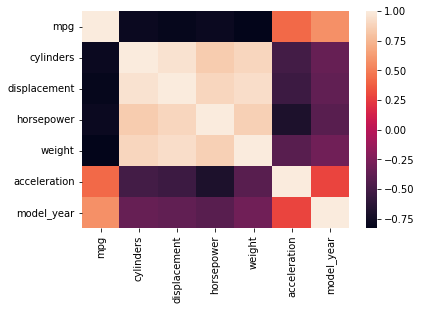

In [0]:
sns.heatmap(my_data.corr())

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.


In [0]:
X = my_data["horsepower"].to_numpy()
y = my_data["mpg"].to_numpy()

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Split the data
Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.

np docs - https://numpy.org/doc/stable/reference/index.html#reference

In [0]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [0]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Creating and Fitting

In [0]:
from sklearn.linear_model import LinearRegression
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[39.36562799] [-0.15297545]


### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [0]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

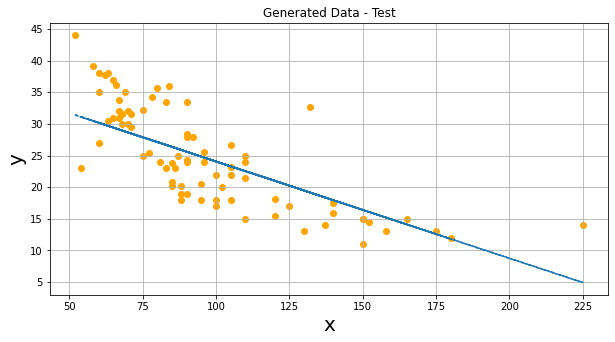

In [0]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

### Results and Evaluation
One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).

In [0]:
print(linr.score(x_test, y_test))

0.5749959307112218


In [0]:
MAE = np.mean(abs(y_test - y_hat))
MAE

7.756195456791836

# Repeat the process!
Try running linear regression on multiple combinations of features (columns) on your dataset. What combination yields the best score? How does this connect to your correlation chart? 